In [3]:
import os
import glob
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")


pd.options.display.max_rows = None

os.chdir('/mnt/BioHome/jreyna/jreyna/projects/t1d-loop-catalog/')

outdir = 'results/hg38/finemapping/sgls_summary/'
os.makedirs(outdir, exist_ok=True)

Listing the cell groups

In [4]:
sample_grps = {
    'CD4_Naive': ['CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3'],
    'CD8_Naive': ['CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD8_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD8_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD8_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3'],
    'Monocyte': ['Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Monocyte_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Monocyte_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Monocyte_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Monocyte_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Monocyte_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Monocyte_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'THP-1-WT.GSE149420.Homo_Sapiens.H3K27ac.b1'],
    'Naive_B': ['Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Naive_B_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Naive_B_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Naive_B_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Nalm6.GSE115492.Homo_Sapiens.H3K27ac.b1'],
    'Natural_Killer': ['Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Natural_Killer_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Natural_Killer_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Natural_Killer_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Natural_Killer_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Natural_Killer_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Natural_Killer_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3',
                 'Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1',
                 'Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2',
                 'Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3'],
    'Nonclassical_Monocyte': ['Nonclassical_Monocyte_1786.phs001703v4p1.Homo_Sapiens.H3K27ac.b1',
                 'Nonclassical_Monocyte_1786.phs001703v4p1.Homo_Sapiens.H3K27ac.b2',
                 'Nonclassical_Monocyte_1786.phs001703v4p1.Homo_Sapiens.H3K27ac.b3',
                 'Nonclassical_Monocyte_1786.phs001703v4p1.Homo_Sapiens.H3K27ac.b4',
                 'Nonclassical_Monocyte_1800.phs001703v4p1.Homo_Sapiens.H3K27ac.b1',
                 'Nonclassical_Monocyte_1800.phs001703v4p1.Homo_Sapiens.H3K27ac.b2',
                 'Nonclassical_Monocyte_1800.phs001703v4p1.Homo_Sapiens.H3K27ac.b3',
                 'Nonclassical_Monocyte_1800.phs001703v4p1.Homo_Sapiens.H3K27ac.b4',
                 'Nonclassical_Monocyte_1831.phs001703v4p1.Homo_Sapiens.H3K27ac.b1',
                 'Nonclassical_Monocyte_1831.phs001703v4p1.Homo_Sapiens.H3K27ac.b2',
                 'Nonclassical_Monocyte_1831.phs001703v4p1.Homo_Sapiens.H3K27ac.b3',
                 'Nonclassical_Monocyte_1831.phs001703v4p1.Homo_Sapiens.H3K27ac.b4']
}

In [5]:
sample_grps2 = {}
for grp, grp_lists in sample_grps.items():
    for s in grp_lists:
        sample_grps2[s] = grp

In [6]:
len(sample_grps2)

104

#### Adding gene information

In [7]:
gencode_df = pd.read_table('results/refs/ensembl/gencode.v30.annotation.w_genetypes.bed', header=None,
                          names=['chrom', 'start', 'end', 'strand', 'type', 'geneid', 'genename', 'genetype'])
gencode_df = gencode_df.loc[gencode_df.type == 'gene'].drop('type', axis=1)
gencode_df.loc[:,'geneid'] = gencode_df.loc[:,'geneid'].str.replace('\.[0-9]*', '', regex=True)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/mnt/BioHome/jreyna/tmp/ipykernel_362028/3756824197.py:4: SyntaxWarning: invalid escape sequence '\.'
  gencode_df.loc[:,'geneid'] = gencode_df.loc[:,'geneid'].str.replace('\.[0-9]*', '', regex=True)


## Load all SGL Data


In [8]:
#fns = glob.glob('results/hg38/finemapping/sgls/*/Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.5000.finemap_sgls.tsv')
fns = glob.glob('results/hg38/finemapping/sgls/*/*.finemap_sgls.tsv')

all_data = []
for fn in fns:
    
    # split meta information
    info = fn.split('/')
    genome = info[1]
    causaldb_fn = info[4]
    sample = info[5].rsplit('.', maxsplit=3)[0]

    # load sgl table
    tdf = pd.read_table(fn)
    tdf.loc[:, 'causaldb_fn'] = causaldb_fn
    tdf.loc[:, 'sample'] = sample
    tdf.loc[:, 'sample_grp'] = sample_grps2[sample]

    # append to all
    all_data.append(tdf)

all_df = pd.concat(all_data)

In [9]:
# load hichip meta information
causal_metadata_fn = 'workflow/qscripts/finemap/causal_db/init.gwas_study.causal_db.immune_select_samples.tsv'
causal_metadata = pd.read_table(causal_metadata_fn, header=None)

# merge meta data
causal_metadata_mapper =  causal_metadata.iloc[:, [2, 8, 18]]
causal_metadata_mapper.columns = ['mesh_term', 'author', 'filename']
all_df = all_df.merge(causal_metadata_mapper, left_on='causaldb_fn', right_on='filename')

# add snp position
all_df['snp_pos'] = all_df['chr_snp'].astype(str) + ':' + all_df['end_snp'].astype(str)

In [10]:
causal_metadata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,d42e3729-8215-4778-974f-a9d5051a4aeb,Rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,25708,5539.0,20169.0,1,Stahl EA,20453842,2010,13,2233741,3843,TBD,TBD,Finemapping,360,CA391
1,8574c210-8cb1-42d6-9833-79c5f32f09e4,Rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,47580,13838.0,33742.0,1,Eyre S,23143596,2012,18,127348,2354,TBD,TBD,Finemapping,405,CA104
2,02462b8d-2056-42c1-9671-c15fb92d0d39,Rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,22515,4873.0,17642.0,4,Okada Y,24390342,2014,18,5444129,9523,TBD,TBD,Finemapping,463,PH378
3,2f182c92-40eb-4b05-974f-caa2ebfbd448,M06 Other rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,452264,4747.0,447517.0,1,Roslin Institute,30349118,2018,11,9124412,4140,TBD,TBD,Finemapping,1274,AT452
4,275fa47a-98ef-4915-a74c-5d490b55a906,M05 Seropositive rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,452264,636.0,451628.0,1,Roslin Institute,30349118,2018,20,9124412,2251,TBD,TBD,Finemapping,1275,AT454
5,274e7d27-e1fc-49c7-806f-fb3b6cc47151,rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,452264,5082.0,447182.0,1,Roslin Institute,30349118,2018,12,9124412,4753,TBD,TBD,Finemapping,1276,AT551
6,1cc480f7-03ef-4362-9f40-a33ac8b09a8c,M06 Other rheumatoid arthritis,"Arthritis, Rheumatoid",D001172,361194,1401.0,359793.0,1,Nealelab,Nealelab,2018,11,10816317,6958,TBD,TBD,Finemapping,2644,BE151
7,704211b3-37bf-461e-ac29-788cefdb5ed8,atopic eczema,"Dermatitis, Atopic",D003876,796661,22474.0,774187.0,1,Sliz E,34454985,2021,30,16327155,2075,Causal DB/GWAS Catalog,GCST90027161,Finemapping,5120,GD09159
8,5e4558d6-add7-49cb-8b49-2c78afb800c7,Type 1 diabetes(meta),"Diabetes Mellitus, Type 1",D003922,14245,6672.0,7573.0,1,Onengut Gumuscu S,25751624,2015,35,114970,1720,TBD,TBD,Finemapping,512,CA265
9,21609ba1-8eff-4d3f-8a7c-6a216cc197d5,Type 1 diabetes(cc),"Diabetes Mellitus, Type 1",D003922,17091,6808.0,10283.0,1,Onengut Gumuscu S,25751624,2015,27,117510,1463,TBD,TBD,Finemapping,513,CA266


#### Mini-summary

In [11]:
# count the samples
num_samples = all_df['sample'].nunique()
print('Number of samples with SGLs:', num_samples)

# count the total number of sgl events
print('Number of SGL events:', all_df.shape[0]) 

# count the total number of sgls
uniq_sgls_df = all_df.drop_duplicates(subset=['chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop', 'snp_pos', 'geneid'])
print('Number of unique sgls:', uniq_sgls_df.shape[0])

# count the unique genes
num_uniq_genes = all_df.geneid.nunique()
print('Number of unique genes:', num_uniq_genes)

# count the unique snps
num_uniq_snps = (all_df['chrA_loop'].astype(str) + '-' + all_df['end_snp'].astype(str)).nunique()
print('Number of unique snps:', num_uniq_snps)

# count the unique loops
uniq_loops_df = all_df.drop_duplicates(subset=['chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop'])
print('Number of unique loops:', uniq_loops_df.shape[0])

Number of samples with SGLs: 104
Number of SGL events: 102269
Number of unique sgls: 9127
Number of unique genes: 1043
Number of unique snps: 2065
Number of unique loops: 2296


Also want to look at the number of SNPs we started with

In [12]:
num_snps_study = pd.read_table('results/hg38/finemapping/snps/singles/num_snps.tsv', header=None)
num_snps_study.columns = ['num_snps', 'filename']
num_snps_study = num_snps_study.merge(causal_metadata_mapper)
num_snps_study_mesh = num_snps_study.groupby('mesh_term').sum()
num_snps_study_mesh

,num_snps,filename,author
mesh_term,,,
"Arthritis, Rheumatoid",1121,AT452AT454AT551BE151CA104CA391PH378,Roslin InstituteRoslin InstituteRoslin Institu...
"Dermatitis, Atopic",674,GD09159,Sliz E
"Diabetes Mellitus, Type 1",7729,AT280CA265CA266GD08996GD09063GD09519GD09657,Roslin InstituteOnengut Gumuscu SOnengut Gumus...
Psoriasis,590,AT258AT548GD09415,Roslin InstituteRoslin InstituteTsoi LC


## Overview of SGLs Across All Diseases

### Count the number of sgls per GWAS Study

I would expect that, in general, that studies with more snps will have more SGLs.

In [13]:
grps = all_df.groupby(['causaldb_fn', 'mesh_term', 'author'])
counts = grps['chrA_loop'].count().to_frame()
counts.columns = ['num_sgls']

In [14]:
counts.sort_values(['mesh_term', 'num_sgls'], ascending=[True, False])

,,,num_sgls
causaldb_fn,mesh_term,author,
PH378,"Arthritis, Rheumatoid",Okada Y,11488
AT452,"Arthritis, Rheumatoid",Roslin Institute,5255
CA104,"Arthritis, Rheumatoid",Eyre S,4336
AT551,"Arthritis, Rheumatoid",Roslin Institute,3736
CA391,"Arthritis, Rheumatoid",Stahl EA,748
AT454,"Arthritis, Rheumatoid",Roslin Institute,566
BE151,"Arthritis, Rheumatoid",Nealelab,547
GD09159,"Dermatitis, Atopic",Sliz E,7099
AT280,"Diabetes Mellitus, Type 1",Roslin Institute,22681


In [15]:
counts.describe()

,num_sgls
count,18.000000
mean,5681.611111
std,5665.219887
min,547.000000
25%,2028.250000
50%,4486.000000
75%,5773.000000
max,22681.000000


### Count and plot the number of sgls, snps and genes per mesh term

In [16]:
uniq_sgls_mesh_df = all_df.drop_duplicates(subset=['chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop', 'snp_pos', 'geneid', 'mesh_term'])
uniq_sgls_mesh_df['loop_id'] = uniq_sgls_mesh_df['chrA_loop'].astype(str) + ':' \
                            + uniq_sgls_mesh_df['startA_loop'].astype(str) + '--' \
                            + uniq_sgls_mesh_df['chrB_loop'].astype(str) + ':' \
                            + uniq_sgls_mesh_df['startB_loop'].astype(str)

mesh_sgl_grps = uniq_sgls_mesh_df.groupby(['mesh_term'])
sgl_counts = mesh_sgl_grps['loop_id'].count().to_frame()
sgl_counts.columns = ['num_sgls']
sgl_counts.sort_values('num_sgls', ascending=False)

/mnt/BioHome/jreyna/tmp/ipykernel_362028/4268753814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniq_sgls_mesh_df['loop_id'] = uniq_sgls_mesh_df['chrA_loop'].astype(str) + ':' \


,num_sgls
mesh_term,
"Diabetes Mellitus, Type 1",5211
"Arthritis, Rheumatoid",2252
"Dermatitis, Atopic",908
Psoriasis,880


In [17]:
# number of unique genes per mesh term
mesh_gene_grps = uniq_sgls_mesh_df.drop_duplicates(['geneid', 'mesh_term']).groupby(['mesh_term'])
gene_counts = mesh_gene_grps['loop_id'].count().to_frame()
gene_counts.columns = ['num_genes']
gene_counts.sort_values('num_genes', ascending=False)

,num_genes
mesh_term,
"Diabetes Mellitus, Type 1",647
Psoriasis,311
"Arthritis, Rheumatoid",303
"Dermatitis, Atopic",202


In [18]:
# number of unique snps per mesh term
mesh_snp_grps = uniq_sgls_mesh_df.drop_duplicates(['snp_pos', 'mesh_term']).groupby(['mesh_term'])
snp_counts = mesh_snp_grps['loop_id'].count().to_frame()
snp_counts.columns = ['num_snps']
snp_counts.sort_values('num_snps', ascending=False)

,num_snps
mesh_term,
"Diabetes Mellitus, Type 1",1255
"Arthritis, Rheumatoid",387
"Dermatitis, Atopic",274
Psoriasis,186


In [19]:
combine_uniq_mesh_counts = pd.concat([num_snps_study_mesh[['num_snps']], snp_counts, sgl_counts, gene_counts], axis=1)
combine_uniq_mesh_counts.columns = ['num_total_snps', 'num_snps', 'num_sgls', 'num_genes']
combine_uniq_mesh_counts

,num_total_snps,num_snps,num_sgls,num_genes
mesh_term,,,,
"Arthritis, Rheumatoid",1121,387,2252,303
"Dermatitis, Atopic",674,274,908,202
"Diabetes Mellitus, Type 1",7729,1255,5211,647
Psoriasis,590,186,880,311


In [20]:
num_snps_study_mesh

,num_snps,filename,author
mesh_term,,,
"Arthritis, Rheumatoid",1121,AT452AT454AT551BE151CA104CA391PH378,Roslin InstituteRoslin InstituteRoslin Institu...
"Dermatitis, Atopic",674,GD09159,Sliz E
"Diabetes Mellitus, Type 1",7729,AT280CA265CA266GD08996GD09063GD09519GD09657,Roslin InstituteOnengut Gumuscu SOnengut Gumus...
Psoriasis,590,AT258AT548GD09415,Roslin InstituteRoslin InstituteTsoi LC


In [21]:
# extract data
plot_data = combine_uniq_mesh_counts.melt(ignore_index=False).reset_index()
plot_data.replace({'num_total_snps': 'GWAS SNPs', 'num_snps': 'SGL SNPs',
                    'num_genes': 'SGL Genes', 'num_sgls': 'SGLs',
                    'Arthritis, Rheumatoid': 'RA', 'Dermatitis, Atopic': 'AD',
                    'Diabetes Mellitus, Type 1': 'T1D', 'Psoriasis': 'PS'})

,mesh_term,variable,value
0,RA,GWAS SNPs,1121
1,AD,GWAS SNPs,674
2,T1D,GWAS SNPs,7729
3,PS,GWAS SNPs,590
4,RA,SGL SNPs,387
5,AD,SGL SNPs,274
6,T1D,SGL SNPs,1255
7,PS,SGL SNPs,186
8,RA,SGLs,2252
9,AD,SGLs,908


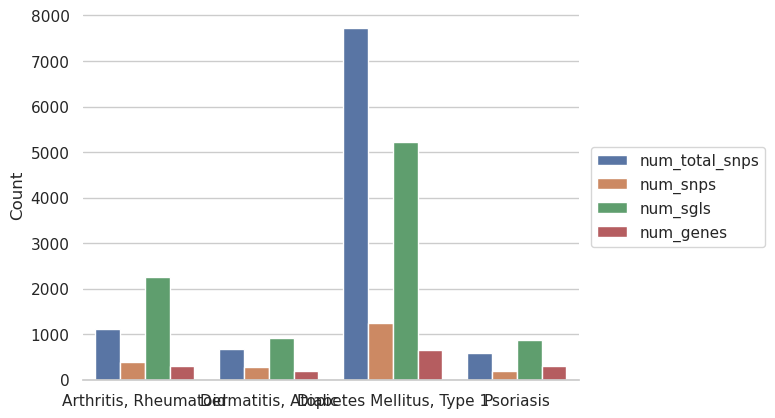

In [22]:
# plot data
fig, ax = plt.subplots()

sns.barplot(plot_data, x='mesh_term', y='value', hue='variable', ax=ax)

# remove left spine
sns.despine(left=True)

# move legend
sns.move_legend(ax, "upper center", bbox_to_anchor=(1.2, 0.65))

# rotate X-Axis Ticks by 45-degrees
#ax.tick_params(axis='x', labelrotation = 75)

# set labels
ax.set_xlabel('')
ax.set_ylabel('Count')
legend = ax.legend_
legend.set_title('') 

outfn = os.path.join(outdir, 'sgl_breakdowns.png')
fig.savefig(outfn, dpi=600, bbox_inches='tight')

We can see that Type 1 Diabetes has the most number of SGLs. 

In [25]:
mesh_grps = all_df.groupby('mesh_term')

In [26]:
def get_top_counts(df, n=10):
    sorted_df = df.genename.value_counts().iloc[0:n]
    return(sorted_df)
mesh_grps.apply(get_top_counts)

mesh_term                  genename  
Arthritis, Rheumatoid      IER3-AS1       532
                           IER3           532
                           FLOT1          532
                           HIST1H3A       511
                           HIST1H4A       511
                           ARID5B         403
                           Z84485.1       373
                           BRPF3          373
                           HSP90AB1       355
                           HLA-DRA        320
Dermatitis, Atopic         MIR6090        539
                           NFKBIA         485
                           TRIB1          400
                           AL662844.4     297
                           HCG27          297
                           ESYT1          228
                           AC034102.7     228
                           ZC3H10         228
                           RPL41          228
                           RNF41          178
Diabetes Mellitus, Type 1  CHRAC1        2

If we get the top SGLs based on genes we can see that gene such as NFKBIA are coming up.

## Diving into SGLs for T1D

In [27]:
t1d_df = mesh_grps.get_group('Diabetes Mellitus, Type 1')

In [28]:
sgl_viz_cols = ['chr_snp', 'end_snp',
                'genename', 'geneid', 'start_gene', 'end_gene',
                'startA_loop', 'startB_loop', '-log10_qval_loop',
                'sample', 'author']
t1d_df.sort_values(['-log10_qval_loop', 'chr_snp', 'end_snp'], ascending=[False, True, True])[sgl_viz_cols].head(10)

,chr_snp,end_snp,genename,geneid,start_gene,end_gene,startA_loop,startB_loop,-log10_qval_loop,sample,author
94583,13,91310826,MIR17HG,ENSG00000215417,91347819,91347820,91310000,91345000,265.020415,THP-1-WT.GSE149420.Homo_Sapiens.H3K27ac.b1,Forgetta V
94584,13,91312880,MIR17HG,ENSG00000215417,91347819,91347820,91310000,91345000,265.020415,THP-1-WT.GSE149420.Homo_Sapiens.H3K27ac.b1,Forgetta V
16066,17,40600717,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,213.681272,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
16067,17,40601477,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,213.681272,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
16068,17,40601507,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,213.681272,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
16065,17,40601537,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,213.681272,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
16069,17,40602009,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,213.681272,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
16064,17,40602398,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,213.681272,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
15597,17,40600717,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,209.329506,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ
15598,17,40601477,CCR7,ENSG00000126353,40565471,40565472,40565000,40600000,209.329506,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,Inshaw JRJ


In [29]:
t1d_uniq_sgls = t1d_df.drop_duplicates(['chrA_loop', 'chrB_loop', 'startA_loop', 'startB_loop', 'geneid', 'start_snp'])

### Count and plot the number of sgls and snps per gene

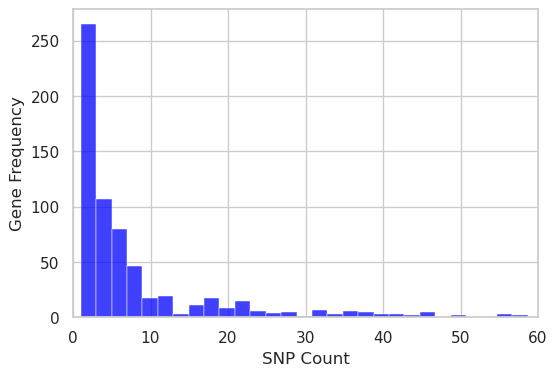

In [30]:
# getting the data
snps_per_gene = t1d_uniq_sgls.groupby('geneid').snp_pos.nunique().sort_values(ascending=False).reset_index()

# plotting
fig, ax = plt.subplots(figsize=(6,4))
sns.set_theme(style="whitegrid")
sns.histplot(snps_per_gene['snp_pos'], color='blue', binwidth=2, ax=ax)

ax.set_xlim(0, 60)
ax.set_xlabel('SNP Count')
ax.set_ylabel('Gene Frequency')
ax.set_title('')

outfn = os.path.join(outdir, 't1d_sgls.snps_per_gene.png')
fig.savefig(outfn, dpi=600, bbox_inches='tight')


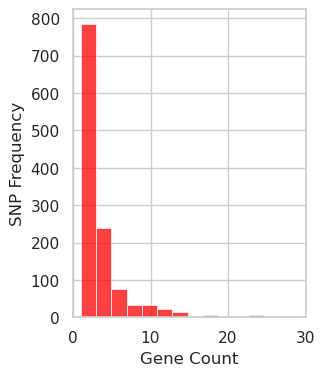

In [31]:
# getting the data
genes_per_snp = t1d_uniq_sgls.groupby('snp_pos').geneid.nunique().sort_values(ascending=False).reset_index()

# plotting
fig, ax = plt.subplots(figsize=(3,4))
sns.set_theme(style="whitegrid")
sns.histplot(genes_per_snp['geneid'], color='red', binwidth=2, ax=ax)

ax.set_xlim(0, 30)
ax.set_xlabel('Gene Count')
ax.set_ylabel('SNP Frequency')

outfn = os.path.join(outdir, 't1d_sgls.genes_per_snp.png')
fig.savefig(outfn, dpi=600, bbox_inches='tight')

In [32]:
genes_per_snp.head()

,snp_pos,geneid
0,6:26021644,64
1,6:26157534,61
2,6:26157851,61
3,6:27869489,57
4,6:27865396,57


### Checking Bach2

In [37]:
bach2_geneid = 'ENSG00000112182'
bach2_df = t1d_df.loc[t1d_df.geneid==bach2_geneid]
bach2_df.head()

,chrA_loop,startA_loop,endA_loop,chrB_loop,startB_loop,endB_loop,-log10_qval_loop,chr_snp,start_snp,end_snp,...,genename,geneid,strand,causaldb_fn,sample,sample_grp,mesh_term,author,filename,snp_pos
11579,6,90170000,90175000,6,90295000,90300000,7.637617,6,90170673,90170674,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90170674
11580,6,90265000,90270000,6,90295000,90300000,15.305303,6,90267048,90267049,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90267049
11581,6,90275000,90280000,6,90295000,90300000,12.704215,6,90278152,90278153,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90278153
11697,6,90140000,90145000,6,90295000,90300000,9.418301,6,90140444,90140445,...,BACH2,ENSG00000112182,-,GD09657,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens...,CD4_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90140445
11698,6,90140000,90145000,6,90295000,90300000,9.418301,6,90142538,90142539,...,BACH2,ENSG00000112182,-,GD09657,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens...,CD4_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90142539


In [36]:
mouri_snp = 90267049
mouri_snp_bach2 = bach2_df.loc[bach2_df.end_snp == mouri_snp]
mouri_snp_bach2.head()

,chrA_loop,startA_loop,endA_loop,chrB_loop,startB_loop,endB_loop,-log10_qval_loop,chr_snp,start_snp,end_snp,...,genename,geneid,strand,causaldb_fn,sample,sample_grp,mesh_term,author,filename,snp_pos
11580,6,90265000,90270000,6,90295000,90300000,15.305303,6,90267048,90267049,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90267049
11702,6,90265000,90270000,6,90295000,90300000,32.380608,6,90267048,90267049,...,BACH2,ENSG00000112182,-,GD09657,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens...,CD4_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90267049
11866,6,90265000,90270000,6,90295000,90300000,8.374764,6,90267048,90267049,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90267049
11892,6,90265000,90270000,6,90295000,90300000,9.911117,6,90267048,90267049,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90267049
11927,6,90265000,90270000,6,90295000,90300000,10.204107,6,90267048,90267049,...,BACH2,ENSG00000112182,-,GD09657,CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,6:90267049


In [35]:
mouri_snp_bach2['-log10_qval_loop'].describe()

count    200.000000
mean      25.867183
std       16.095708
min        4.683816
25%       11.904183
50%       22.066757
75%       36.413044
max       65.549020
Name: -log10_qval_loop, dtype: float64

#### Number of samples 

In [38]:
mouri_snp_bach2_study_grps = mouri_snp_bach2.groupby(['sample_grp', 'author', 'filename'])

for grp, grp_df in mouri_snp_bach2_study_grps:
    display(grp)
    #display(grp_df)
    display(grp_df['sample'].nunique())

('CD4_Naive', 'Chiou J', 'GD08996')

18

('CD4_Naive', 'Inshaw JRJ', 'GD09657')

18

('CD4_Naive', 'Onengut Gumuscu S', 'CA265')

18

('CD4_Naive', 'Onengut Gumuscu S', 'CA266')

18

('CD4_Naive', 'Robertson CC', 'GD09063')

18

('CD8_Naive', 'Chiou J', 'GD08996')

17

('CD8_Naive', 'Inshaw JRJ', 'GD09657')

17

('CD8_Naive', 'Onengut Gumuscu S', 'CA265')

17

('CD8_Naive', 'Onengut Gumuscu S', 'CA266')

17

('CD8_Naive', 'Robertson CC', 'GD09063')

17

('Naive_B', 'Chiou J', 'GD08996')

5

('Naive_B', 'Inshaw JRJ', 'GD09657')

5

('Naive_B', 'Onengut Gumuscu S', 'CA265')

5

('Naive_B', 'Onengut Gumuscu S', 'CA266')

5

('Naive_B', 'Robertson CC', 'GD09063')

5

In [39]:
mouri_snp_bach2_mesh_grps = mouri_snp_bach2.groupby(['mesh_term', 'sample_grp'])
for grp, grp_df in mouri_snp_bach2_mesh_grps:
    display(grp)
    #display(grp_df)
    num_sgl_samples = grp_df['sample'].nunique()
    print('{} out of {}'.format(num_sgl_samples, len(sample_grps[grp[1]])))

('Diabetes Mellitus, Type 1', 'CD4_Naive')

18 out of 18


('Diabetes Mellitus, Type 1', 'CD8_Naive')

17 out of 18


('Diabetes Mellitus, Type 1', 'Naive_B')

5 out of 19


#### Distribution of rs72928038 + BACH2 SGL across all studies

In [40]:
# mouri_snp_bach2_grps.count().chrA_loop.to_frame()

We were able to find this specific SGL within **CD4_Naive**, **CD8_Naive** and **Naive_B** samples but NOT within Monocyte, Natural_Killer, Nonclassical_Monocyte. 

In [42]:
[(k, len(x)) for k, x in sample_grps.items()]

[('CD4_Naive', 18),
 ('CD8_Naive', 18),
 ('Monocyte', 19),
 ('Naive_B', 19),
 ('Natural_Killer', 18),
 ('Nonclassical_Monocyte', 12)]

### Compare to the Consensus Gene List

In [43]:
def print_genelist(genelist):
    print('\n'.join(list(genelist)))

#### Save a list of unique genes for T1D

In [44]:
# get the uniq T1D SGL genes
uniq_genes = t1d_df.genename.unique()
print('The unique number of genes is: {}'.format(len(uniq_genes)))

The unique number of genes is: 643


In [45]:
# save the SGL genes found for T1D
uniq_fn = os.path.join(outdir, 'uniq_genes.t1d.txt')
with open(uniq_fn, 'w') as fw:
    s = '\n'.join(sorted(uniq_genes))
    fw.write(s)

#### Load the consensus T1D gene list

In [46]:
t1d_consensus_list_fn = '/mnt/bioadhoc-temp/Groups/vd-ay/jreyna/projects/dchallenge/results/main/gene_lists/consensus_gene_list.txt'
t1d_consensus_genes = pd.read_table(t1d_consensus_list_fn, header=None, names=['genename'])
print('The number of consensus genes is: {}'.format(t1d_consensus_genes.shape[0]))

The number of consensus genes is: 497


#### Overlap the SGL genes with the consensus genes 

In [47]:
t1d_plus_consensus_df = t1d_df.loc[t1d_df.genename.isin(t1d_consensus_genes.iloc[:, 0].tolist())]

In [48]:
shared_t1d_plus_consensus_genes = sorted(t1d_plus_consensus_df.genename.unique().tolist())
print('The unique number of genes is: {}'.format(len(shared_t1d_plus_consensus_genes)))

The unique number of genes is: 64


In [49]:
all_t1d_genes = set(t1d_df.genename.tolist())

In [50]:
only_t1d_genes = all_t1d_genes.difference(shared_t1d_plus_consensus_genes)

In [51]:
# save the SGL genes found for T1D
uniq_fn = os.path.join(outdir, 'left_venn_only.uniq_genes.t1d.txt')
with open(uniq_fn, 'w') as fw:
    s = '\n'.join(sorted(only_t1d_genes))
    fw.write(s)

## Investigate Novel Genes

In [52]:
# extract protein coding genes and non-MT
prot_list = ['protein_coding', 'IG_V_gene', 'IG_C_gene', 'IG_J_gene',
             'TR_C_gene', 'TR_J_gene', 'TR_V_gene', 'TR_D_gene', 'IG_D_gene']
base_genes_df = gencode_df.loc[(gencode_df.genetype.isin(prot_list)) & (~gencode_df.chrom.isin(['chrM']))]

# get novel genes for T1D
novel_gene_df = base_genes_df.loc[base_genes_df.genename.isin(only_t1d_genes)]
novel_gene_df

,chrom,start,end,strand,geneid,genename,genetype
57602,chr1,35176378,35193145,-,ENSG00000116560,SFPQ,protein_coding
58245,chr1,35573314,35595328,+,ENSG00000116819,TFAP2E,protein_coding
58310,chr1,35713877,35718894,-,ENSG00000142686,C1orf216,protein_coding
58738,chr1,35930718,36072500,+,ENSG00000126070,AGO3,protein_coding
58986,chr1,36088892,36093932,+,ENSG00000116863,ADPRHL2,protein_coding
59348,chr1,36224432,36305357,+,ENSG00000054118,THRAP3,protein_coding
59583,chr1,36339624,36385896,-,ENSG00000196182,STK40,protein_coding
59713,chr1,36391238,36397908,-,ENSG00000181817,LSM10,protein_coding
132684,chr1,113929324,113977869,+,ENSG00000163349,HIPK1,protein_coding
137728,chr1,120150898,120176515,-,ENSG00000265808,SEC22B,protein_coding


In [53]:
novel_gene_sgls = t1d_df.loc[all_df.geneid.isin(novel_gene_df.geneid.tolist())]

In [54]:
# testing the removal of hist proteins
novel_gene_sgls = novel_gene_sgls.loc[~novel_gene_sgls.genename.str.contains('HIST')]

In [55]:
print(','.join(list(novel_gene_sgls.geneid.unique())))

ENSG00000090339,ENSG00000257411,ENSG00000170515,ENSG00000229117,ENSG00000139641,ENSG00000135482,ENSG00000176476,ENSG00000261832,ENSG00000184730,ENSG00000131748,ENSG00000094804,ENSG00000131759,ENSG00000173812,ENSG00000197279,ENSG00000181852,ENSG00000139579,ENSG00000141736,ENSG00000141741,ENSG00000167914,ENSG00000161847,ENSG00000124508,ENSG00000196812,ENSG00000282988,ENSG00000146109,ENSG00000163349,ENSG00000220201,ENSG00000105371,ENSG00000105376,ENSG00000099985,ENSG00000137312,ENSG00000137331,ENSG00000146278,ENSG00000115271,ENSG00000135414,ENSG00000134470,ENSG00000092841,ENSG00000108344,ENSG00000094975,ENSG00000072121,ENSG00000233232,ENSG00000182952,ENSG00000186470,ENSG00000026950,ENSG00000062485,ENSG00000176422,ENSG00000135517,ENSG00000072110,ENSG00000261717,ENSG00000131747,ENSG00000135341,ENSG00000080298,ENSG00000117592,ENSG00000205323,ENSG00000123353,ENSG00000170473,ENSG00000131771,ENSG00000162894,ENSG00000160190,ENSG00000160188,ENSG00000166848,ENSG00000065427,ENSG00000183153,ENSG0000

In [56]:
# counting snp-gene pairs 
novel_gene_sgls.loc[:, 'sgname'] = novel_gene_sgls.loc[:, 'genename'] + ' & ' + novel_gene_sgls.loc[:, 'snp_pos']
sgpair_counts = novel_gene_sgls.sgname.value_counts().to_frame()

In [62]:
novel_gene_sgls.head()

,chrA_loop,startA_loop,endA_loop,chrB_loop,startB_loop,endB_loop,-log10_qval_loop,chr_snp,start_snp,end_snp,...,geneid,strand,causaldb_fn,sample,sample_grp,mesh_term,author,filename,snp_pos,sgname
11488,19,10270000,10275000,19,10345000,10350000,10.049182,19,10349292,10349293,...,ENSG00000090339,+,GD09657,Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens....,Monocyte,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,19:10349293,ICAM1 & 19:10349293
11489,19,10270000,10275000,19,10360000,10365000,6.181877,19,10364975,10364976,...,ENSG00000090339,+,GD09657,Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens....,Monocyte,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,19:10364976,ICAM1 & 19:10364976
11490,12,56040000,56045000,12,56100000,56105000,6.809307,12,56042144,56042145,...,ENSG00000257411,+,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,12:56042145,AC034102.2 & 12:56042145
11491,12,56040000,56045000,12,56100000,56105000,6.809307,12,56042144,56042145,...,ENSG00000170515,+,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,12:56042145,PA2G4 & 12:56042145
11492,12,56040000,56045000,12,56100000,56105000,6.809307,12,56041627,56041628,...,ENSG00000257411,+,GD09657,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,CD8_Naive,"Diabetes Mellitus, Type 1",Inshaw JRJ,GD09657,12:56041628,AC034102.2 & 12:56041628


I'm interested in the frequency of each SNP + gene pair. Hopefully there is a pair with lots of samples. 

In [63]:
sgl_freqs = sgpair_counts.sort_index()['count'].unique()
sgl_freqs

array([ 17,   2,   5,   1,   6,  18,  80,  32,   4,  26,   7,  19,  30,
        66,   3,  15,  12,   9,  25,  10,  24,  48,  46,  21,  42,  63,
       168,  23,  28,  16,   8,  14,  68,  43,  58,  61,  22,  13,  36,
        45,  73,  20,  69,  11,  40,  35,  39, 215,  86,  78, 102,  90,
       120,  44,  93,  84, 252, 192, 180,  29,  71,  47,  49,  96,  33,
        37,  70])

In [64]:
sgpair_counts.head()

,count
sgname,
SGF29 & 16:28494339,252
RPL41 & 12:56041628,215
ZC3H10 & 12:56041628,215
ESYT1 & 12:56041628,215
STARD3 & 17:39752614,192


In [65]:
sum(sgpair_counts.index.str.contains('RARA'))

11

In [66]:
sgpair_counts.loc[sgpair_counts.index.str.contains('RARA')]

,count
sgname,
RARA & 17:40601537,5
RARA & 17:40601477,5
RARA & 17:40601507,5
RARA & 17:40602009,5
RARA & 17:40602398,5
RARA & 17:40600717,5
RARA & 17:40609263,3
RARA & 17:40606948,3
RARA & 17:40599413,2


Unfortunately there are not. Initially I was trying to find an example where a SGL is found across many samples but this is just not found in the data. So I started to think, what else can I find or what other point can I make? For now, the point that I will try making is that we found a good SNP (or gene) which is found across many samples. 

I'll start with a good SNP, if I find one. 

In [67]:
snp_counts = novel_gene_sgls.drop_duplicates(subset=['sample', 'snp_pos']) # want unique sample + snps
snp_counts = snp_counts.groupby(by=['sample_grp', 'snp_pos']).count()['chrA_loop'] # counting the unique number of snps per sample 
snp_counts = snp_counts.reset_index().rename(columns={'chrA_loop': 'count'}).sort_values(['sample_grp', 'count'], ascending=[True, False]) # cleaning + sorting
snp_counts = snp_counts.pivot(index='snp_pos', columns='sample_grp', values='count', ) # pivoting for side-by-side analysis of grps
snp_counts = snp_counts.fillna(0) # remove NaN's
snp_counts = snp_counts.astype(int) # convert to ints
snp_counts.loc[:, 'sum'] = snp_counts.iloc[:, 0:6].sum(axis=1) # add row sum
snp_counts.loc[:, 'max'] = snp_counts.iloc[:, 0:6].max(axis=1) # add row max

# add the mb location
def get_mb(x):
    spl = x.split(':')
    res = spl[0] + ':' + spl[1][0:2]
    return(res)
snp_counts['chr_mb'] = [get_mb(x)for x in snp_counts.index.values]

# filter based on the max
snp_counts_flt = snp_counts.loc[snp_counts['max'] > 2].sort_values(['chr_mb', 'max'], ascending=[True, False])

snp_counts_flt = snp_counts_flt.reset_index().set_index(['chr_mb', 'snp_pos']) # creating multi-index with chr_mb

In [70]:
# highlight based on the max
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_gte_thresh = data > 3
        return [attr if v else '' for v in is_gte_thresh]
    else:  # from .apply(axis=None)
        is_gte_thresh = data > 3
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

snp_counts_flt.style.apply(highlight_max, subset=['max'])

In [71]:
novel_gene_sgls.loc[(novel_gene_sgls.snp_pos.str.contains('^11:64'))]['genename']

54183         STIP1
54184         STIP1
54185         STIP1
54186         STIP1
54187        NUDT22
54188         TRPT1
54189        NUDT22
54190         TRPT1
54191        NUDT22
54192         TRPT1
54193        NUDT22
54194         TRPT1
54195      CATSPERZ
54196         ESRRA
54197         ESRRA
54198         ESRRA
54199         ESRRA
54200       TRMT112
54201         PRDX5
54202       TRMT112
54203         PRDX5
54204       TRMT112
54205         PRDX5
54206       TRMT112
54207         PRDX5
54208       TRMT112
54209         PRDX5
54210       TRMT112
54211         PRDX5
54212       TRMT112
54213         PRDX5
54374         ESRRA
54375         ESRRA
54376         ESRRA
54377         ESRRA
54378       TRMT112
54379         PRDX5
54380       TRMT112
54381         PRDX5
54382       TRMT112
54383         PRDX5
54384       TRMT112
54385         PRDX5
54726       TRMT112
54727         PRDX5
54728       TRMT112
54729         PRDX5
54730       TRMT112
54731         PRDX5
54732       TRMT112
